In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("data/iron-spheres-terminal-velocity.xlsx")
df.head()

,Unnamed: 0,Mass [g],Velocity [m/s]
0,0,2.637943e-07,8.207096
1,1,2.110354e-06,11.606586
2,2,7.122446e-06,14.215107
3,3,1.688284e-05,16.414192
4,4,3.297429e-05,18.351624


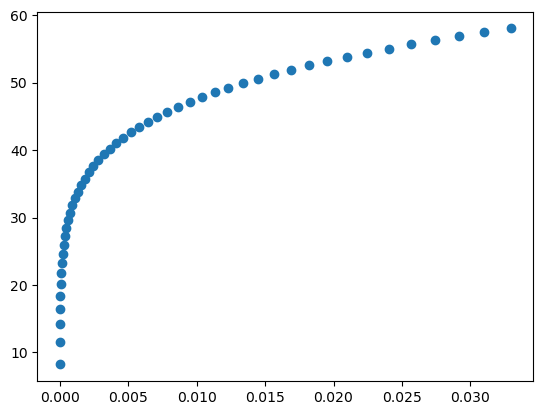

In [7]:
plt.scatter(df["Mass [g]"], df["Velocity [m/s]"])

In [8]:
# Physical constants
g = 9.81  # acceleration due to gravity in m/s^2
rho_air = 1.225  # density of air in kg/m^3 at sea level
rho_iron = 7870  # density of pure iron in kg/m^3

# The drag coefficient is unknown and typically ranges from 0.47 for a smooth sphere
# to 1.05 for a rough sphere, we can try to estimate it from the data if needed.

# Convert mass from grams to kilograms for calculations
df['Mass [kg]'] = df['Mass [g]'] * 1e-3

# Calculate the radius of each sphere from its mass and the density of iron
df['Radius [m]'] = ( (3 * df['Mass [kg]']) / (4 * np.pi * rho_iron) ) ** (1/3)

# Calculate the cross-sectional area of each sphere
df['Area [m^2]'] = np.pi * df['Radius [m]'] ** 2

In [9]:
df.head()

,Unnamed: 0,Mass [g],Velocity [m/s],Mass [kg],Radius [m],Area [m^2]
0,0,2.637943e-07,8.207096,2.637943e-10,0.00002,1.256853e-09
1,1,2.110354e-06,11.606586,2.110354e-09,0.00004,5.027413e-09
2,2,7.122446e-06,14.215107,7.122446e-09,0.00006,1.131168e-08
3,3,1.688284e-05,16.414192,1.688284e-08,0.00008,2.010965e-08
4,4,3.297429e-05,18.351624,3.297429e-08,0.00010,3.142133e-08


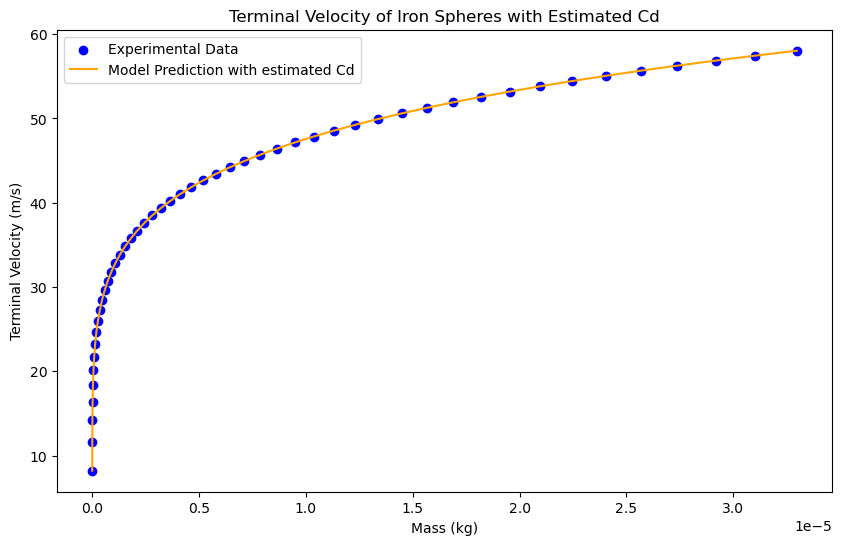

In [13]:
# Calculate Cd for each data point
df['Cd'] = (2 * df['Mass [kg]'] * g) / (rho_air * df['Area [m^2]'] * df['Velocity [m/s]']**2)

# Estimate the drag coefficient by taking the mean of the calculated Cd values
Cd_estimated = df['Cd'].mean()

# Now let's re-calculate the predicted terminal velocity using the estimated Cd
def calculate_terminal_velocity_with_estimated_cd(mass, area, Cd):
    return np.sqrt((2 * mass * g) / (rho_air * area * Cd))

df['Predicted Velocity with estimated Cd [m/s]'] = calculate_terminal_velocity_with_estimated_cd(
    df['Mass [kg]'], df['Area [m^2]'], Cd_estimated)

# Plotting the data with the updated Cd
plt.figure(figsize=(10, 6))

# Plot the experimental data
plt.scatter(df['Mass [kg]'], df['Velocity [m/s]'], color='blue', label='Experimental Data')

# Plot the predicted data with estimated Cd
plt.plot(df['Mass [kg]'], df['Predicted Velocity with estimated Cd [m/s]'], color='orange',
         label='Model Prediction with estimated Cd')

# Add titles and labels
plt.title('Terminal Velocity of Iron Spheres with Estimated Cd')
plt.xlabel('Mass (kg)')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()

In [14]:
df.head()

,Unnamed: 0,Mass [g],Velocity [m/s],Mass [kg],Radius [m],Area [m^2],Cd,Predicted Velocity with estimated Cd [m/s]
0,0,2.637943e-07,8.207096,2.637943e-10,0.00002,1.256853e-09,0.049907,8.207096
1,1,2.110354e-06,11.606586,2.110354e-09,0.00004,5.027413e-09,0.049907,11.606586
2,2,7.122446e-06,14.215107,7.122446e-09,0.00006,1.131168e-08,0.049907,14.215107
3,3,1.688284e-05,16.414192,1.688284e-08,0.00008,2.010965e-08,0.049907,16.414192
4,4,3.297429e-05,18.351624,3.297429e-08,0.00010,3.142133e-08,0.049907,18.351624


In [15]:
# Given data from the Excel sheet
planets_data = {
    'Mercury': {'Distance': 57900000, 'Period': 88},
    'Venus': {'Distance': 108200000, 'Period': 224.7},
    'Earth': {'Distance': 149600000, 'Period': 365.2},
    'Mars': {'Distance': 227900000, 'Period': 687},
    'Jupiter': {'Distance': 778600000, 'Period': 4331},
    'Saturn': {'Distance': 1433500000, 'Period': 10747},
    'Uranus': {'Distance': 2872500000, 'Period': 30589},
    'Neptune': {'Distance': 4495100000, 'Period': 59800},
    'Pluto': {'Distance': 5906400000, 'Period': 90560}
}

# Constants
G = 6.67430e-11  # Gravitational constant in N(m^2)/(kg^2)
M_sun = 1.989e30  # Mass of the Sun in kg
km_to_m = 1e3  # Conversion factor from km to m
days_to_seconds = 24 * 3600  # Conversion factor from days to seconds

# Calculate theoretical orbital periods using Kepler's third law
theoretical_periods = {}
for planet, data in planets_data.items():
    R = data['Distance'] * km_to_m  # Convert distance from km to m
    T_squared = (4 * np.pi**2 * R**3) / (G * M_sun)
    T = np.sqrt(T_squared)  # Orbital period in seconds
    T_days = T / days_to_seconds  # Convert period from seconds to days
    theoretical_periods[planet] = T_days

theoretical_periods

{'Mercury': 87.93539486428945,
 'Venus': 224.63983095889623,
 'Earth': 365.21050633813775,
 'Mars': 686.6925888107595,
 'Jupiter': 4336.281538534151,
 'Saturn': 10832.842237573854,
 'Uranus': 30728.115638267784,
 'Neptune': 60152.6699804304,
 'Pluto': 90600.40845354972}